# Random general inversion

Define a general ppf-function for an arbitrary 1-dim function pdf(x, args).
Use it to generate random numbers, which are distributed according to pdf. 
Follow the instruction in chapter 1.6. 
This numerical method to generate a ppf can be used for all 1-D functions,
but it is quite slow. 

In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt 
from scipy.integrate import quad
from scipy.stats import expon
from scipy.optimize import brentq

In [2]:
# example pdf-function, change it according to your needs
def pdf(x,*args):
    return (x-args[0])**2 + args[1]

In [3]:
def cdf(x,func, *args):
    return quad(func,0,x,args=args)[0]

In [4]:
def ppf(y, low, high, pdf, *args):
    """
    Calculate the ppf numerically for a 1-dim function pdf(x, *args)
    
    Parameters:
    y : float in (0,1)
    low : float of lower limit in x
    high: float with upper limit in x
    pdf : function pdf(x,*args)
    """
    def cdfy(x,func, *args):
        # calculate the cdf of func(x,*args)
        # normalize to integral over full range
        # subtract y-value because brentq returns the root,
        # i.e. the x-value where fx/f0-y == 0
        fx = quad(func,low,x,args=args)[0]
        f0 = quad(func,low,high,args=args)[0]
        return fx/f0 -y
    return brentq(cdfy,low,high,args=(pdf,*args))

In [5]:
def ppfrand(Y, low, high, pdf, *args):
    """
    Generate random numbers according to the pdf function using 
    the array Y of uniform random numbers Y
    """
    l = []
    for y in Y:
        l.append(ppf(y,low,high,pdf,*args))
    return np.array(l)

In [6]:
def fsin(t,om,phi0):
    # define a complicated function f(x,*args)
    return np.sqrt((1+np.sin(om*t+phi0))*om*t)

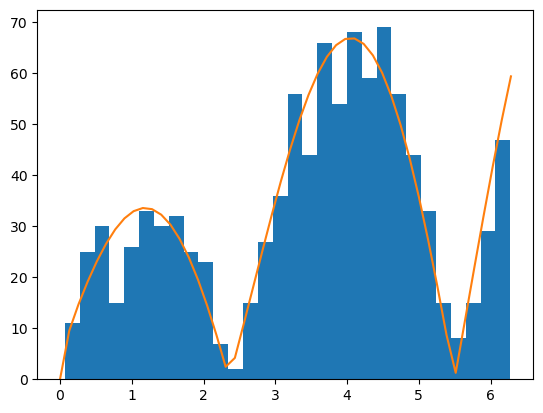

In [7]:
# plot the function and histogram of random numbers
# normalize both properly
low = 0
high = 2*np.pi
om = 2
phi0 = 0.
N = 1000
nbin = 30
binsize = (high-low)/nbin

# get histogram of random numbers
Y  = np.random.rand(N) # array of uniform random numbers
R  = ppfrand(Y,low,high,fsin,om,phi0) # array of random numbers
plt.hist(R, bins=nbin) # plot histogram of random numbers

# calculate function pdf(x,..) 
# normalise by dividing by the integral over the whole range and 
# multiplying by N and the binsize to compare with the histogram.
x = np.linspace(low,high)
y = fsin(x,om,phi0)/quad(fsin,low,high,args=(om,phi0))[0]*N*binsize
plt.plot(x,y) # plot function